# Gather

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
from datetime import date,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

for filename in os.listdir():
    if '.csv' in filename:
        print(filename)
        temp = pd.read_csv(filename)
        if 'calendar' in filename:
            calendar = temp
        elif 'listings' in filename:
            listings = temp
        else: 
            reviews = temp

calendar.csv
listings.csv
reviews.csv


# Assess

In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [14]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
82,1956274,https://www.airbnb.com/rooms/1956274,20160104002432,2016-01-04,Sweet Ballard Apartment for Two,Located in the Sunset Hill/Ballard Area of Sea...,I hope this space will make my guests feel lik...,Located in the Sunset Hill/Ballard Area of Sea...,none,All the fun and interesting things there are t...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.11
83,8537192,https://www.airbnb.com/rooms/8537192,20160104002432,2016-01-04,Charming Old Ballard Bungalow (2/2),This is a second room in our lovely home that ...,NaN,This is a second room in our lovely home that ...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,2,NaN
84,5919096,https://www.airbnb.com/rooms/5919096,20160104002432,2016-01-04,Ballard Victorian 900 sq ft apt,See upper apartment listing for reviews. Locat...,The apartment is on the main floor of a circa ...,See upper apartment listing for reviews. Locat...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,0.26
85,6516529,https://www.airbnb.com/rooms/6516529,20160104002432,2016-01-04,"One-bedroom Apartment, Ballard",One of twelve units in a charming 1924 buildin...,Big windows in the kitchen and living room ope...,One of twelve units in a charming 1924 buildin...,none,Ballard is a vibrant neighborhood loaded with ...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,1,NaN
86,3294243,https://www.airbnb.com/rooms/3294243,20160104002432,2016-01-04,Beautiful Ballard condo with view!,My beautiful 2-bedroom condo is in the heart o...,Beautiful condo facing south and west with an ...,My beautiful 2-bedroom condo is in the heart o...,none,Ballard is a well-known and popular neighborho...,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,1.48


Check out all review related attributes

In [25]:
listings.iloc[:,73:83].describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000
mean,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245
std,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259
min,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [12]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


****Business Understanding****

1. What are the busiest times of the year to visit Seattle? By how much do prices spike?
2. Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?
3. What aspects correlate well to pricing?
4. What aspects correlate well to rating (review value)?

**Data Understanding**

* Question 1 : Use Calendar data, which contains date and price
* Question 2 : Join listing data with calendar data using listing ID. Use earliest calendar record on the listing as its creation date and track the creation of listings over time using the same. Also use calendar data to track number of bookings (visitors) over time.
* Question 3 : Find the (quantitative/quantifiable) attributes under listing that correlate best to pricing. Join listing and calendar data, group by listings, find average pricing and use the attributes under listing data to predict that average. 
* Question 4 : Find the numeric attributes that correlate well to review_scores_value from listings data

# Clean

**Prepare Data**

In [2]:
# Date columns which are strings need to be converted
def strip_time(date):
    return datetime.strptime(date,'%Y-%m-%d')

listings['host_since'] = listings.host_since.apply(lambda x:strip_time(x) if x is not np.nan else x)
reviews['date'] = reviews.date.apply(lambda x:strip_time(x))
calendar.date = calendar.date.apply(lambda x:strip_time(x))

# Create separate columns for all attributes of date for every date column
def convert_timestamp_to_attributes(df):
    for date_column in df.columns.values:
        df[date_column+'_date'] = df[date_column].apply(lambda x:x.date())
        df[date_column+'_day'] = df[date_column].apply(lambda x:x.day)
        df[date_column+'_dayofweek'] = df[date_column].apply(lambda x:x.dayofweek)
        df[date_column+'_dayname'] = df[date_column].apply(lambda x:x.strftime('%a'))
        df[date_column+'_dayofyear'] = df[date_column].apply(lambda x:x.dayofyear)
        df[date_column+'_month'] = df[date_column].apply(lambda x:x.month)
        df[date_column+'_weekofyear'] = df[date_column].apply(lambda x:x.weekofyear)
        df[date_column+'_year'] = df[date_column].apply(lambda x:x.year)
    return df


In [3]:
# Find number of days between min and max dates in all dataframes
delta_days = np.max([reviews.date.min(),reviews.date.max(),calendar.date.min(),calendar.date.max(),listings.host_since.min(),listings.host_since.max()])-np.min([reviews.date.min(),reviews.date.max(),calendar.date.min(),calendar.date.max(),listings.host_since.min(),listings.host_since.max()])

# Find min date in all dataframes
start_date = np.min([reviews.date.min(),reviews.date.max(),calendar.date.min(),calendar.date.max(),listings.host_since.min(),listings.host_since.max()])

# Create date dataframe with all necessary attributes to later merge
# with all date attributes of the listings, review and calendar dataframes

date_list = []
for i in range(delta_days.days + 1):
    day = start_date + timedelta(days=i)
    date_list.append(day)
date_frame = pd.DataFrame(date_list)
date_frame.columns = ['timestamp']

# Create date dataframe with below command
convert_timestamp_to_attributes(date_frame)

,timestamp,timestamp_date,timestamp_day,timestamp_dayofweek,timestamp_dayname,timestamp_dayofyear,timestamp_month,timestamp_weekofyear,timestamp_year
0,2008-11-10,2008-11-10,10,0,Mon,315,11,46,2008
1,2008-11-11,2008-11-11,11,1,Tue,316,11,46,2008
2,2008-11-12,2008-11-12,12,2,Wed,317,11,46,2008
3,2008-11-13,2008-11-13,13,3,Thu,318,11,46,2008
4,2008-11-14,2008-11-14,14,4,Fri,319,11,46,2008
5,2008-11-15,2008-11-15,15,5,Sat,320,11,46,2008
6,2008-11-16,2008-11-16,16,6,Sun,321,11,46,2008
7,2008-11-17,2008-11-17,17,0,Mon,322,11,47,2008
8,2008-11-18,2008-11-18,18,1,Tue,323,11,47,2008
9,2008-11-19,2008-11-19,19,2,Wed,324,11,47,2008


In [4]:
listings = listings.merge(date_frame, left_on='host_since', right_on= 'timestamp')
reviews = reviews.merge(date_frame, left_on='date', right_on= 'timestamp')
calendar = calendar.merge(date_frame, left_on='date', right_on= 'timestamp')

In [5]:
# Assess Data for any discrepancies

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 0 to 84848
Data columns (total 15 columns):
listing_id              84849 non-null int64
id                      84849 non-null int64
date                    84849 non-null datetime64[ns]
reviewer_id             84849 non-null int64
reviewer_name           84849 non-null object
comments                84831 non-null object
timestamp               84849 non-null datetime64[ns]
timestamp_date          84849 non-null object
timestamp_day           84849 non-null int64
timestamp_dayofweek     84849 non-null int64
timestamp_dayname       84849 non-null object
timestamp_dayofyear     84849 non-null int64
timestamp_month         84849 non-null int64
timestamp_weekofyear    84849 non-null int64
timestamp_year          84849 non-null int64
dtypes: datetime64[ns](2), int64(9), object(4)
memory usage: 10.4+ MB


In [13]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 13 columns):
listing_id              1393570 non-null int64
date                    1393570 non-null datetime64[ns]
available               1393570 non-null object
price                   934542 non-null object
timestamp               1393570 non-null datetime64[ns]
timestamp_date          1393570 non-null object
timestamp_day           1393570 non-null int64
timestamp_dayofweek     1393570 non-null int64
timestamp_dayname       1393570 non-null object
timestamp_dayofyear     1393570 non-null int64
timestamp_month         1393570 non-null int64
timestamp_weekofyear    1393570 non-null int64
timestamp_year          1393570 non-null int64
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 148.8+ MB


Check where and why price is null

In [20]:
calendar[calendar.price.isnull()].head()

,listing_id,date,available,price,timestamp,timestamp_date,timestamp_day,timestamp_dayofweek,timestamp_dayname,timestamp_dayofyear,timestamp_month,timestamp_weekofyear,timestamp_year
3,7421966,2016-01-04,f,NaN,2016-01-04,2016-01-04,4,0,Mon,4,1,1,2016
5,5956968,2016-01-04,f,NaN,2016-01-04,2016-01-04,4,0,Mon,4,1,1,2016
8,4948745,2016-01-04,f,NaN,2016-01-04,2016-01-04,4,0,Mon,4,1,1,2016
10,175576,2016-01-04,f,NaN,2016-01-04,2016-01-04,4,0,Mon,4,1,1,2016
13,8889257,2016-01-04,f,NaN,2016-01-04,2016-01-04,4,0,Mon,4,1,1,2016


So, listing is only null when listing is unavailable. As verified below.

In [22]:
calendar[(calendar.price.isnull())&(calendar.available!='f')]

,listing_id,date,available,price,timestamp,timestamp_date,timestamp_day,timestamp_dayofweek,timestamp_dayname,timestamp_dayofyear,timestamp_month,timestamp_weekofyear,timestamp_year


Price is an object, check its format and convert to decimal

In [69]:
calendar.price.head()

0     $85.00
1    $125.00
2    $975.00
3        NaN
4    $600.00
Name: price, dtype: object

In [5]:
calendar.price = calendar.price.apply(lambda x: float(x.replace('$','').replace(',','')) if x is not np.nan else x)

In [79]:
calendar.price.head()

0     85.0
1    125.0
2    975.0
3      NaN
4    600.0
Name: price, dtype: float64

Will clean listings data based on requirement as there are more than a 100 columns to consider

**Question 1 : What are the busiest times of the year to visit Seattle? By how much do prices spike?**

**Using calendar data to answer question 1.a by**
1. Day of Year
2. Month
3. Weekday
4. Week of Year
5. Day of Month

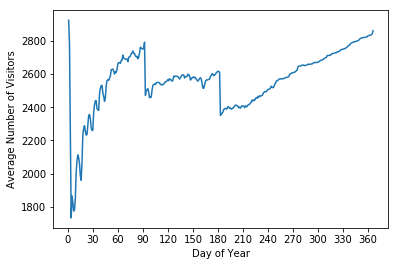

In [6]:
plt.plot(calendar.groupby(by=['timestamp_dayofyear']).count()['price']);
plt.xticks(np.arange(0,365,30));
plt.xlabel('Day of Year');
plt.ylabel('Average Number of Visitors');

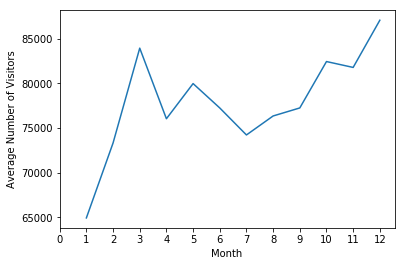

In [7]:
plt.plot(calendar.groupby(by=['timestamp_month']).count()['price']);
plt.xticks(np.arange(0,13,1));
plt.xlabel('Month');
plt.ylabel('Average Number of Visitors');

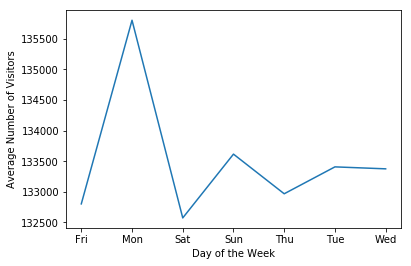

In [8]:
plt.plot(calendar.groupby(by=['timestamp_dayname']).count()['price']);
plt.xlabel('Day of the Week');
plt.ylabel('Average Number of Visitors');

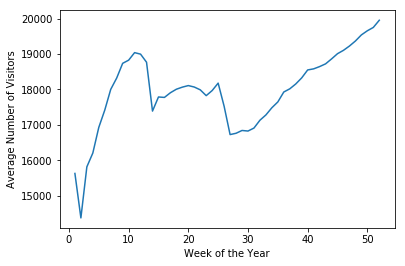

In [9]:
plt.plot(calendar.groupby(by=['timestamp_weekofyear']).count()['price']);
plt.xlabel('Week of the Year');
plt.ylabel('Average Number of Visitors');

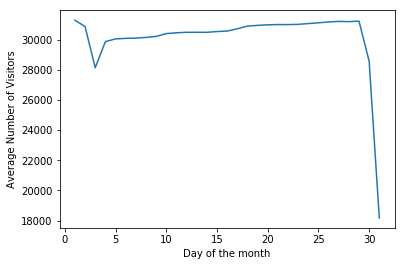

In [10]:
plt.plot(calendar.groupby(by=['timestamp_day']).count()['price']);
plt.xlabel('Day of the month');
plt.ylabel('Average Number of Visitors');

**Using calendar data to answer question 1.b by day of year**

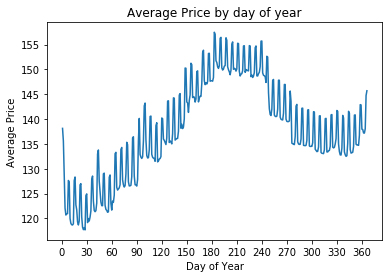

In [11]:
plt.plot(calendar.groupby(by=['timestamp_dayofyear']).mean()['price'].rolling(1).mean());
plt.title("Average Price by day of year")
plt.xticks(np.arange(0,365,30));
plt.xlabel('Day of Year');
plt.ylabel('Average Price');

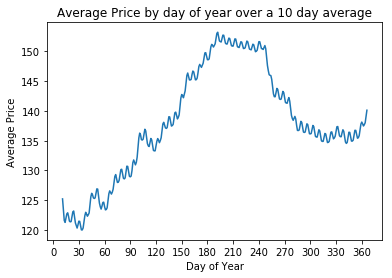

In [12]:
plt.plot(calendar.groupby(by=['timestamp_dayofyear']).mean()['price'].rolling(10).mean());
plt.title("Average Price by day of year over a 10 day average")
plt.xticks(np.arange(0,365,30));
plt.xlabel('Day of Year');
plt.ylabel('Average Price');

**Question 2 : Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?**

Find creation date of listings by merging with calendar data to identify the very first booking on it

In [13]:
listings = listings.merge(calendar[calendar.available!='f'].groupby('listing_id')['timestamp'].min().reset_index(),
               left_on='id',right_on='listing_id')
listings.rename(columns={"timestamp_y":"creation_date","timestamp_x":"timestamp"},inplace=True)

Plot the number of listings by creation date

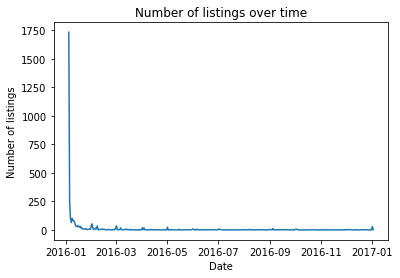

In [28]:
plt.plot(listings.groupby('creation_date')['listing_id'].count().sort_index());
plt.title("Number of listings over time")
plt.xlabel('Date');
plt.ylabel('Number of listings');

Plot the number of listings by creation date, ignoring the initial spike 

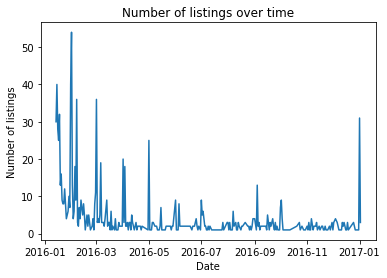

In [27]:
plt.plot(listings.groupby('creation_date')['listing_id'].count().sort_index()[10:]);
plt.title("Number of listings over time")
plt.xlabel('Date');
plt.ylabel('Number of listings');

Plot number of visitors by date, using calendar data

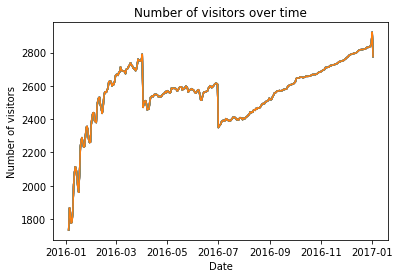

In [26]:
plt.plot(calendar[calendar.available!='f'].groupby('timestamp').count().sort_index());
plt.title("Number of visitors over time")
plt.xlabel('Date');
plt.ylabel('Number of visitors');

**Question 3 : What aspects correlate well to price?**

In [14]:
# Find all Quantifiable attributes that might be related to rating
print(listings.iloc[:,:99].info())
print(listings.iloc[:,99:].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3721 entries, 0 to 3720
Data columns (total 99 columns):
id                                  3721 non-null int64
listing_url                         3721 non-null object
scrape_id                           3721 non-null int64
last_scraped                        3721 non-null object
name                                3721 non-null object
summary                             3545 non-null object
space                               3167 non-null object
description                         3721 non-null object
experiences_offered                 3721 non-null object
neighborhood_overview               2717 non-null object
notes                               2155 non-null object
transit                             2809 non-null object
thumbnail_url                       3407 non-null object
medium_url                          3407 non-null object
picture_url                         3721 non-null object
xl_picture_url                      3407

In [17]:
# Retrieve all quantifiable/categorical attributes and store listings data in a separate dataframe

listings_quant = listings[['id','timestamp','host_response_rate','host_acceptance_rate','host_is_superhost',
                          'host_listings_count','property_type','room_type','accommodates','bathrooms',
                          'bedrooms','beds','price','security_deposit','cleaning_fee','guests_included',
                          'extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_value',
                          'instant_bookable','cancellation_policy','require_guest_profile_picture',
                          'require_guest_phone_verification','calculated_host_listings_count']]

# Convert non numerical attributes to numerical or categorical

listings_quant['host_since_days'] = listings_quant.timestamp.apply(lambda x:(datetime.now()-x).days)
listings_quant['host_since_months'] = listings_quant.timestamp.apply(lambda x:(datetime.now()-x).days/30)
listings_quant['host_response_rate'] = listings_quant.host_response_rate.apply(lambda x:float(x.strip('%')) if x is not np.nan else x)
listings_quant['host_acceptance_rate'] = listings_quant.host_acceptance_rate.apply(lambda x:float(x.strip('%')) if x is not np.nan else x)
listings_quant['host_is_superhost'] = listings_quant.host_is_superhost.apply(lambda x:1 if x=='t' else 0)
listings_quant['price'] = listings_quant.price.apply(lambda x: float(x.replace('$','').replace(',','')) if x is not np.nan else x)
listings_quant['instant_bookable'] = listings_quant.instant_bookable.apply(lambda x:1 if x=='t' else 0)
listings_quant['require_guest_profile_picture'] = listings_quant.require_guest_profile_picture.apply(lambda x:1 if x=='t' else 0)
listings_quant['require_guest_phone_verification'] = listings_quant.require_guest_phone_verification.apply(lambda x:1 if x=='t' else 0)
listings_quant['security_deposit'] = listings_quant.security_deposit.apply(lambda x: float(x.replace('$','').replace(',','')) if x is not np.nan else x)
listings_quant['cleaning_fee'] = listings_quant.cleaning_fee.apply(lambda x: float(x.replace('$','').replace(',','')) if x is not np.nan else x)


listings_quant = pd.get_dummies(listings_quant,columns=['room_type','cancellation_policy'])

**Find correlation between pricing and the numeric attributes in modified listings dataframe**

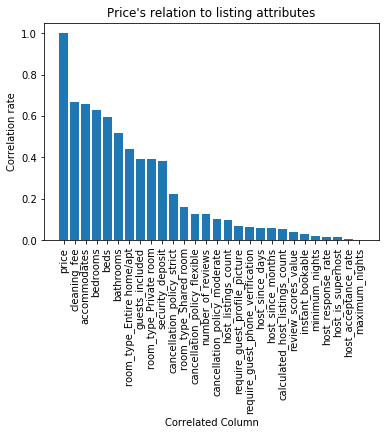

In [18]:
temp = listings_quant.drop(columns=['id']).corr().loc['price']
temp = pd.Series({k:abs(v) for (k,v) in zip(temp.index,temp.values)}).sort_values(ascending=False)
plt.bar(x=temp.index,height=temp.values)
plt.title("Price's relation to listing attributes")
plt.xlabel("Correlated Column")
plt.ylabel("Correlation rate")
plt.xticks(rotation=90);

**This indicates that hosts primarily decide the price of a listing based on the number of bedrooms/beds/bathrooms it has, number of people it can accommodate and similar features**

Find mean booking price, number of bookings and total booking price for listings and find attibutes that correlate well to each of them

In [19]:
listings_quant = listings_quant.merge(calendar.groupby('listing_id')['price'].mean().reset_index()
                     ,left_on='id',right_on='listing_id',left_index=True).rename(columns={'price_y':'mean_booking_price'
                                                                                          ,'price_x':'price'})
listings_quant.drop(columns=['listing_id'],inplace=True)

In [20]:
listings_quant = listings_quant.merge(calendar.groupby('listing_id')['price'].sum().reset_index()
                     ,left_on='id',right_on='listing_id',left_index=True).rename(columns={'price_y':'sum_booking_price'
                                                                                          ,'price_x':'price'})
listings_quant.drop(columns=['listing_id'],inplace=True)

In [21]:
listings_quant = listings_quant.merge(calendar.groupby('listing_id')['price'].count().reset_index()
                     ,left_on='id',right_on='listing_id',left_index=True).rename(columns={'price_y':'count_bookings'
                                                                                          ,'price_x':'price'})
listings_quant.drop(columns=['listing_id'],inplace=True)

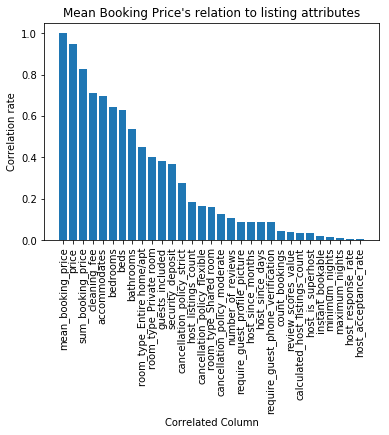

In [22]:
temp = listings_quant.drop(columns=['id']).corr().loc['mean_booking_price']
temp = pd.Series({k:abs(v) for (k,v) in zip(temp.index,temp.values)}).sort_values(ascending=False)
plt.bar(x=temp.index,height=temp.values)
plt.title("Mean Booking Price's relation to listing attributes")
plt.xlabel("Correlated Column")
plt.ylabel("Correlation rate")
plt.xticks(rotation=90);

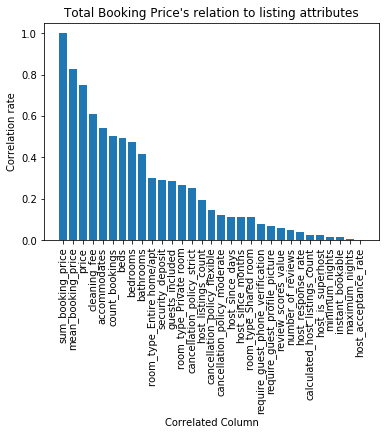

In [23]:
temp = listings_quant.drop(columns=['id']).corr().loc['sum_booking_price']
temp = pd.Series({k:abs(v) for (k,v) in zip(temp.index,temp.values)}).sort_values(ascending=False)
plt.bar(x=temp.index,height=temp.values)
plt.title("Total Booking Price's relation to listing attributes")
plt.xlabel("Correlated Column")
plt.ylabel("Correlation rate")
plt.xticks(rotation=90);

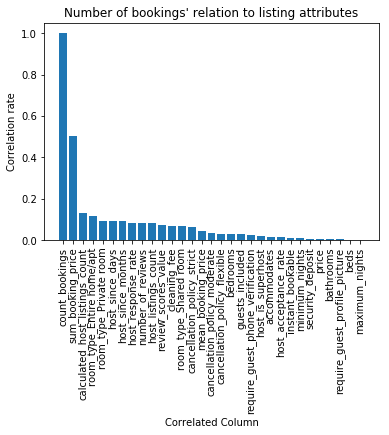

In [24]:
temp = listings_quant.drop(columns=['id']).corr().loc['count_bookings']
temp = pd.Series({k:abs(v) for (k,v) in zip(temp.index,temp.values)}).sort_values(ascending=False)
plt.bar(x=temp.index,height=temp.values)
plt.title("Number of bookings' relation to listing attributes")
plt.xlabel("Correlated Column")
plt.ylabel("Correlation rate")
plt.xticks(rotation=90);

**Question 4 : Find factors that correlate well to rating**

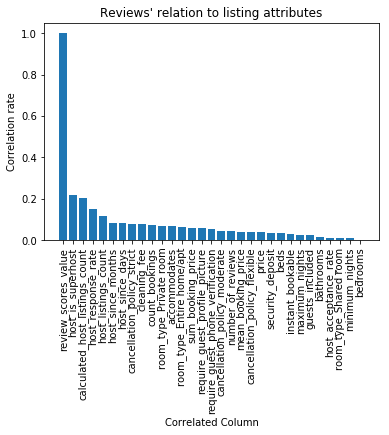

In [25]:
temp = listings_quant.drop(columns=['id']).corr().loc['review_scores_value']
temp = pd.Series({k:abs(v) for (k,v) in zip(temp.index,temp.values)}).sort_values(ascending=False)
plt.bar(x=temp.index,height=temp.values)
plt.title("Reviews' relation to listing attributes")
plt.xlabel("Correlated Column")
plt.ylabel("Correlation rate")
plt.xticks(rotation=90);